
## 5.1 数据处理
### 5.1.1 数据增强

数据增强是指在现有数据下，通过对数据进行各种变换、剪切等手段增加数据量。如对一幅图像，可以通过图像操作如镜像、旋转、剪切、变形、滤波、改变颜色、增加噪声、覆盖等从一个原图像变化出很多图像，从而增大了数据的总量。

可以用skimage的io模块读取一幅图像：

(233, 328, 3)


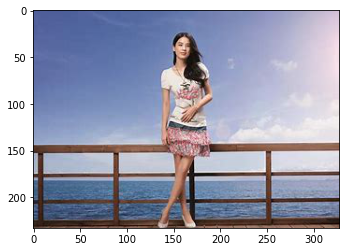

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform

image = io.imread('image.jpg')
print(image.shape)
plt.imshow(image)
plt.show() 

可以通过numpy的数组操作，对图像进行各种变换，如`image[:,::-1, :]`可对图像进行水平镜像翻转：

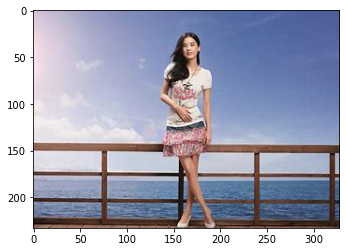

In [3]:
img = image[:,::-1, :]
plt.imshow(img)
plt.show()

剪切一个窗口中的图像：

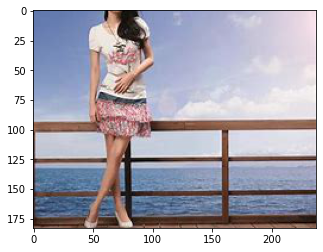

In [4]:
img = image[50:300,90:400, :]
plt.imshow(img)
plt.show() 

或者直接对图像的每个像素进行处理：

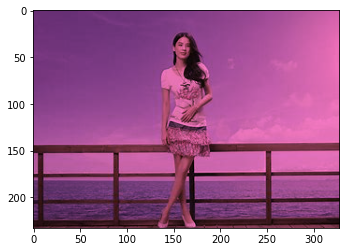

In [5]:
def convert(image):
    image = image.astype(np.float64)
    yuvimg = np.empty(image.shape)
    if False:
        yuvimg[:,:,0] = image[:,:,0]*0.5+image[:,:,1]*0.2+ image[:,:,2]*0.3
        yuvimg[:,:,1] = image[:,:,1]*0.5
        yuvimg[:,:,2] = image[:,:,1]*0.1+ image[:,:,2]*0.7
    else:
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                rgb = image[y, x]
                yuvimg[y, x][0] = rgb[0]*0.5+rgb[1]*0.2+rgb[2]*0.3
                yuvimg[y, x][1] = rgb[1]*0.5
                yuvimg[y, x][2] = rgb[1]*0.1+rgb[2]*0.7
            
    return yuvimg.astype(np.uint8)
img = convert(image)
plt.imshow(img)
plt.show() 

利用numpy的函数如invet()等对图像颜色进行变换：

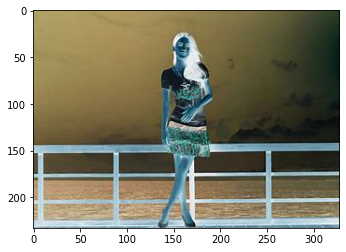

In [6]:
img = np.invert(image)
plt.imshow(img)
plt.show() 

skimage的不同模块如util、transform等提供了对图像进行不同变换的函数，如用util的random_noise()函数给图像添加噪声：

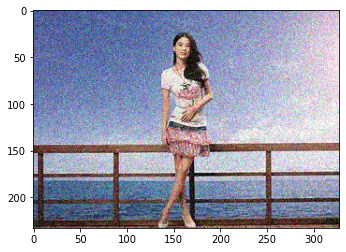

In [7]:
from skimage import util
img = util.random_noise(image)
plt.imshow(img)
plt.show()

用transform的rotate()对图像可以进行旋转：

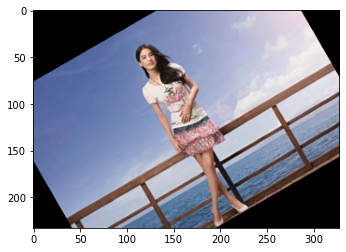

In [8]:
from skimage import transform
img = transform.rotate(image, 30)
plt.imshow(img)
plt.show()

改变图像强度的对比度：

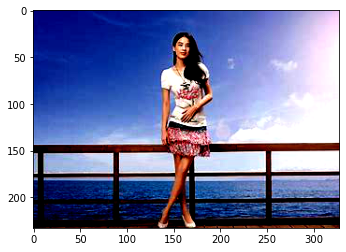

In [9]:
from skimage import  exposure
v_min, v_max = np.percentile(image, (18, 89.8))
img = exposure.rescale_intensity(image, in_range=(v_min, v_max))
plt.imshow(img)
plt.show()

改变图像的曝光度：

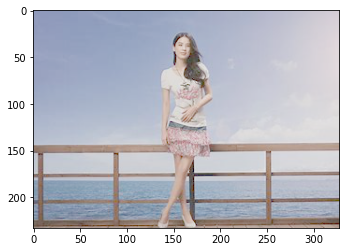

In [10]:
# gamma and gain parameters are between 0 and 1
img = exposure.adjust_gamma(image, gamma=0.4, gain=0.9)
plt.imshow(img)
plt.show()

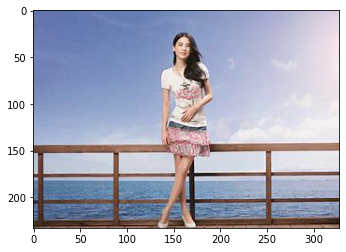

In [11]:
img = exposure.adjust_log(image)
plt.imshow(img)
plt.show()

多颜色通道的彩色图像转化为单通道的灰度图像（黑白图像）：

(233, 328)


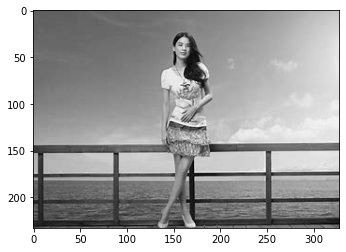

In [12]:
from skimage import  color
img = color.rgb2gray(image)
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()

还可以使用其他的很多Python包对图像等数据进行处理，如scipy的图像处理模块ndimage对图像进行处理，如使图像模糊：

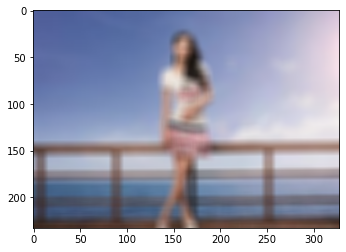

In [13]:
from scipy import ndimage
img = ndimage.uniform_filter(image, size=(11, 11, 1))
plt.imshow(img)
plt.show()

### 5.1.2 规范化
### 5.1.3 特征工程
#### 1.  数据降维与主元分析法

对于下面的二维平面的数据点，每个数据点用2个坐标表示：

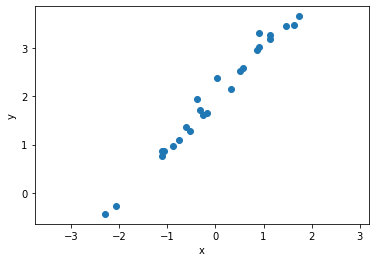

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 生成直线y=2x+1附近的随机的样本点
np.random.seed(1)

pts = 25
x = np.random.randn(pts,1)                 # 随机采样一些x坐标
y = x+2
y  = y+ np.random.randn(pts,1)*0.2              #给 Y随机噪声


plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

将每个点的坐标作为矩阵的一样，所有点坐标可以放在一个矩阵X中并显示前3个坐标点：

In [15]:
X = np.stack((x.flatten(), y.flatten()), axis=-1)
print(X.shape)
print(X[:3])

(25, 2)
[[ 1.62434536  3.48759979]
 [-0.61175641  1.36366554]
 [-0.52817175  1.28467436]]


PCA方法第一步是对每个维（轴）的分量中心化，即使每个维的分量减去该维所有分量的均值:

[[ 1.63707525  1.50798964]
 [-0.59902653 -0.61594461]
 [-0.51544186 -0.69493579]]


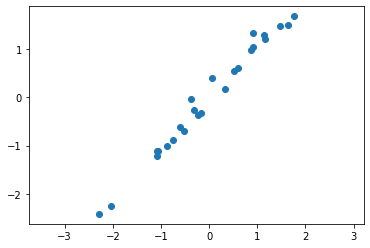

In [16]:
X -= np.mean(X, axis = 0) 
print(X[:3])
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

计算协变矩阵

In [17]:
cov = np.dot(X.T, X) / X.shape[0] # 协变矩阵

对协方差矩阵进行SVD分解，可得到主元（特征向量）U、奇异值（方差，特征值的平方）S，奇异值相当于方差，表示发散程度：

In [18]:
U,S,V = np.linalg.svd(cov)
print(U)
print(S)
print(S[0]/(S[0]+S[1]))

[[-0.68302064 -0.73039907]
 [-0.73039907  0.68302064]]
[2.46815362 0.01168714]
0.995287139793862


U的每一列表示一个主元，主元表示了数据的主要变化方向（主轴方向），如图5-15所示：

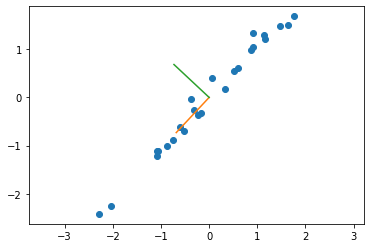

In [19]:
plt.plot(X[:,0],X[:,1],'o')
plt.plot([0,U[0,0]], [0,U[1,0]])
plt.plot([0,U[0,1]], [0,U[1,1]])
plt.axis('equal')
plt.show()

`S[0]`和`S[1]`表示数据在主元方向的比重，可见数据在第一主元的变化占据了更大比重。将数据投影到主元U定义的坐标轴上，可将数据表示为主元的分量。

In [20]:
Xrot = np.dot(X, U)
print(Xrot[:5])

[[-2.21959042 -0.16573019]
 [ 0.85903285  0.01682553]
 [ 0.85963789 -0.09817723]
 [ 1.53210054  0.01886974]
 [-1.32424593  0.03607588]]


在主元轴上显示这些主元分量构成的坐标点：

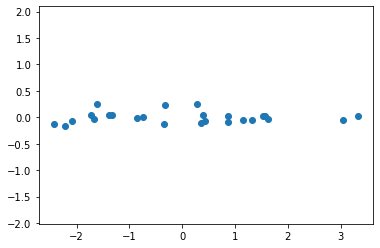

In [21]:
plt.plot(Xrot[:,0],Xrot[:,1],'o')
plt.axis('equal')
plt.show()

将数据转化为主元的分量表示，可以消除新特征之间的相关性，可以从其协变矩阵看出表示不同特征的非对角线的值变成了0。

In [22]:
print(np.dot(Xrot.transpose(),Xrot))

[[6.17038405e+01 9.23506176e-15]
 [9.23506176e-15 2.92178571e-01]]


用第一主元的坐标表示这些样本，则数据的损失几乎为`(1-0.995287139793862)*100% = 0.472%`，几乎可以忽略。这种将数据样本表示为少数主元的线性组合，称为**数据降维**。对于这个例子，可以将样本数据的维度从特征数2减少为特征数1，达到了降低样本特征数的目的。

[[-2.21959042]
 [ 0.85903285]
 [ 0.85963789]]


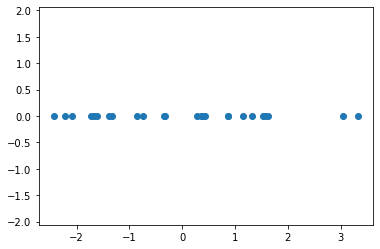

In [23]:
Xrot_reduced = np.dot(X, U[:,:1]) # Xrot_reduced变量了[N x 1]数组
print(Xrot_reduced[:3])
plt.plot(Xrot_reduced[:],[0]*pts,'o')
plt.axis('equal')
plt.show()

可以将投影并降维后的数据反投影到原始数据的主轴上。

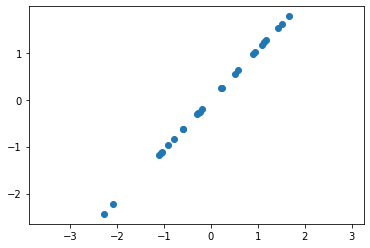

In [24]:
X_temp = np.c_[Xrot_reduced, np.zeros(pts) ]
reProjX = np.dot(X_temp, U.transpose())  
plt.plot(reProjX[:,0],reProjX[:,1],'o')
plt.axis('equal')
plt.show()

#### 2. 白化

白化操作是指减少样本特征的相关性并使这些特征具有相同的方差。将特征除以其标准差可以达到使特征具有相同方差的目的，PCA投影则可以消除特征之间的相关性，因此，白化通常是结合这2个技术，即先进行PCA特征投影消除特征相关性，再对每个特征除以其特征方差。和PCA结合的白化操作称为PCA白化（PCA Whitening）。

前面的代码已经对原始数据X执行投影得到了投影后的Xrot，即Xrot的特征变得相互独立，再执行下面的除以标准差的操作，就完成了白化操作。因原始数据只有2维，为了看出白化操作的效果，并没有对数据进行降维。

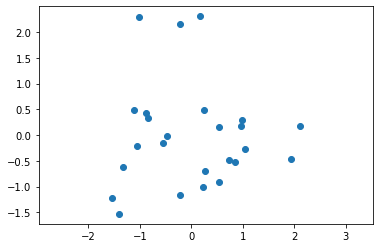

In [25]:
Xwhite = Xrot / np.sqrt(S + 1e-5)      #白化操作：将数据特征除以标准差，是所有特征具有差不多的方差
plt.plot(Xwhite[:,0],Xwhite[:,1],'o')
plt.axis('equal')
plt.show()

经过白化操作后，2个主轴的分量都具有了同样的方差。可以增加数据点进一步观察白化操作的效果，如下面代码所示：

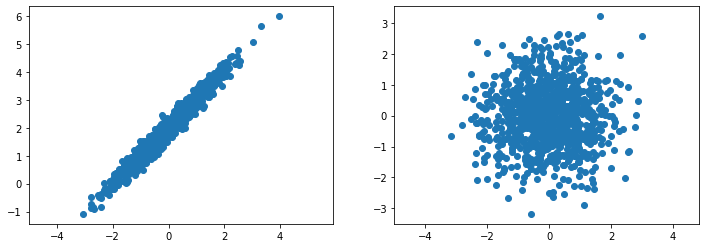

In [26]:
pts = 1000
x = np.random.randn(pts,1)                 # 随机采样一些x坐标
y = x+2+ np.random.randn(pts,1)*0.2
X = np.stack((x.flatten(), y.flatten()), axis=-1)

fig = plt.gcf()
fig.set_size_inches(12, 4, forward=True)
plt.subplot(1,2,1)
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
X -= np.mean(X, axis = 0)
cov = np.dot(X.T, X) / X.shape[0]
U,S,V = np.linalg.svd(cov)
Xrot = np.dot(X, U) 
Xwhite = Xrot / np.sqrt(S + 1e-5)
reProjX = np.dot(Xwhite, U.transpose())  
plt.subplot(1,2,2)
plt.plot(reProjX[:,0],reProjX[:,1],'o')
plt.axis('equal')
plt.show()

## 5.2 参数调试
### 5.2.1 权重初始化

标准正态分布对权重初始化：

In [28]:
W1 = np.random.randn(2,2)*0.01 
b1 = np.zeros((1,2))
W2 = np.random.randn(2,1)*0.01 
b2 = np.zeros((1,1))

#### xavier 初始化

$$\sqrt{2/(n_{in}+n_{out})}$$

$$w\sim U[-\frac{\sqrt{6}}{\sqrt{n_{in}+n_{out}}},\frac{\sqrt{6}}{\sqrt{n_{in}+n_{out}}}]$$



In [29]:
import numpy as np
import math
def calculate_fan_in_and_fan_out(tensor):
    if len(tensor.shape) < 2:
        raise ValueError("tensor with fewer than 2 dimensions")
    if len(tensor.shape) ==2:
        fan_in,fan_out = tensor.shape
    else: #F,C,kH,kW
        num_input_fmaps = tensor.shape[1]  #size(1)  F,C,H,W
        num_output_fmaps = tensor.shape[0]  #size(0)
        receptive_field_size = tensor[0][0].size
        fan_in = num_input_fmaps * receptive_field_size
        fan_out = num_output_fmaps * receptive_field_size   
    return fan_in, fan_out

def xavier_uniform(tensor, gain=1.):    
    fan_in, fan_out = calculate_fan_in_and_fan_out(tensor)
    std = gain * math.sqrt(2.0 / float(fan_in + fan_out))
    bound = math.sqrt(3.0) * std  
    tensor[:] = np.random.uniform(-bound,bound,(tensor.shape))

def xavier_normal(tensor, gain=1.):
    fan_in, fan_out = calculate_fan_in_and_fan_out(tensor)
    std = gain * math.sqrt(2.0 / float(fan_in + fan_out))
    tensor[:] = np.random.normal(0,std,(tensor.shape))

#### Kaiming初始化

$$\sqrt{2/n}$$

In [30]:
def calculate_gain(nonlinearity, param=None):   
    linear_fns = ['linear', 'conv1d', 'conv2d', 'conv3d', 'conv_transpose1d', 'conv_transpose2d', 'conv_transpose3d']
    if nonlinearity in linear_fns or nonlinearity == 'sigmoid':
        return 1
    elif nonlinearity == 'tanh':
        return 5.0 / 3
    elif nonlinearity == 'relu':
        return math.sqrt(2.0)
    elif nonlinearity == 'leaky_relu':
        if param is None:
            negative_slope = 0.01
        elif not isinstance(param, bool) and isinstance(param, int) or isinstance(param, float):           
            negative_slope = param
        else:
            raise ValueError("negative_slope {} not a valid number".format(param))
        return math.sqrt(2.0 / (1 + negative_slope ** 2))
    else:
        raise ValueError("Unsupported nonlinearity {}".format(nonlinearity))
        
def kaiming_uniform(tensor,a=0,mode = 'fan_in', nonlinearity='leaky_relu'):
    fan_in,fan_out = calculate_fan_in_and_fan_out(tensor)
    if mode=='fan_in':       fan = fan_in
    else: fan = fan_out
        
    gain = calculate_gain(nonlinearity, a)
    std = gain / math.sqrt(fan)
    bound = math.sqrt(3.0) * std  
    tensor[:] = np.random.uniform(-bound,bound,(tensor.shape))

def kaiming_normal(tensor,a=0,mode = 'fan_in', nonlinearity='leaky_relu'):
    fan_in,fan_out = calculate_fan_in_and_fan_out(tensor)
    if mode=='fan_in':     fan = fan_in
    else: fan = fan_out
    
    gain = calculate_gain(nonlinearity, a)
    std = gain / math.sqrt(fan)
    bound = math.sqrt(3.0) * std  # Calculate uniform bounds from standard deviation    
    tensor[:] = np.random.normal(0,std,(tensor.shape))

In [31]:
def kaiming(tensor,method_params=None):
    method_type,a,mode,nonlinearity='uniform',0,'fan_in','leaky_relu'
    if method_params:
        method_type = method_params.get('type', "uniform")
        a =  method_params.get('a', 0)
        mode = method_params.get('mode','fan_in' )
        nonlinearity = method_params.get('nonlinearity', 'leaky_relu')
    if method_params=="uniform":
        kaiming_uniform(tensor,a,mode,nonlinearity)
    else:
        kaiming_normal(tensor,a,mode,nonlinearity)   

In [32]:
import numpy as np
w = np.empty((2, 3))
print(w)

xavier_uniform(w)
print("xavier_uniform:",w)
xavier_normal(w)
print("xavier_normal:",w)

kaiming_uniform(w)
print("kaiming_uniform:",w)
kaiming_normal(w)
print("kaiming_normal:",w)

[[5.47481061 0.33611111 5.47481061]
 [3.35611111 9.70208333 0.33611111]]
xavier_uniform: [[-0.768653   -0.80652872  0.50907695]
 [ 0.5136968  -0.70250892 -0.18937972]]
xavier_normal: [[-0.62292348  0.15650357  0.3394799 ]
 [ 0.80736097  0.96223938  0.5510258 ]]
kaiming_uniform: [[ 1.6876517   0.21614074  1.26237496]
 [-0.28160141  0.53509753  1.47314797]]
kaiming_normal: [[-1.25560054  1.04666138 -1.52688637]
 [ 1.23178219  0.9846295  -1.58706882]]


给NeuralNetwork类添加一个初始化其所有层参数的辅助函数`apply(self,init_params_fn)`

In [33]:
def apply(self,init_params_fn):
         for layer in self._layers:            
            init_params_fn(layer)

## 5.3  批规范化

In [45]:
from NeuralNetwork import *

class BatchNorm_1d(Layer):
    def __init__(self,num_features,gamma_beta_method= None,eps = 1e-8,momentum = 0.9):
       # self.d_X, self.h_X, self.w_X = X_dim
       # self.gamma = np.ones((1, int(np.prod(X_dim)) ))
       # self.beta = np.zeros((1, int(np.prod(X_dim))))
       # self.params = [self.gamma,self.beta]
        super().__init__()
        self.eps= eps
        self.momentum = momentum
        if not gamma_beta_method:
            self.gamma = np.ones((1, num_features ))
            self.beta = np.zeros((1, num_features ))             
        else:
            self.gamma = np.random.randn(1, num_features)
            self.beta =  np.random.randn(1, num_features)  #np.zeros((1, num_features )) 
         
        self.running_mu = np.zeros((1, num_features ))  
        self.running_var = np.zeros((1, num_features )) 
        
        self.params = [self.gamma,self.beta]
        self.grads = [np.zeros_like(self.gamma),np.zeros_like(self.beta)]

    def forward(self,X,training = True):
        if training: 
            self.n_X = X.shape[0]
            self.X_shape = X.shape

            self.X_flat = X.ravel().reshape(self.n_X,-1)
            self.mu = np.mean(self.X_flat,axis=0)
            self.var = np.var(self.X_flat, axis=0) # var = 1 / float(N) * np.sum((x - mu) ** 2, axis=0)
            self.X_hat = (self.X_flat - self.mu)/np.sqrt(self.var +self.eps)
            out = self.gamma * self.X_hat + self.beta

            # 计算 means 和 variances 的移动平均
            running_mu,running_var,momentum = self.running_mu,self.running_var,self.momentum
            running_mu = momentum * running_mu + (1 - momentum) * self.mu
            running_var = momentum * running_var + (1 - momentum) * self.var            
        else:             
            X_flat = X.ravel().reshape(X.shape[0],-1)
            # 规范化
            X_hat = (X_flat - running_mean) / np.sqrt(running_var + eps)
            # 放缩和平移
            out = self.gamma * X_hat + self.beta          
        return out.reshape(self.X_shape)

    
    def __call__(self,X):
        return self.forward(X)

    def backward(self,dout):
        eps = self.eps
        dout = dout.ravel().reshape(dout.shape[0],-1)
        X_mu = self.X_flat - self.mu
        var_inv = 1./np.sqrt(self.var + eps)
        
        dbeta = np.sum(dout,axis=0)
        dgamma = np.sum(dout * self.X_hat, axis=0) #dout * self.X_hat

        dX_hat = dout * self.gamma
        dvar = np.sum(dX_hat * X_mu,axis=0) * -0.5 * (self.var + eps)**(-3/2)           
        dmu = np.sum(dX_hat * (-var_inv) ,axis=0) + dvar * 1/self.n_X * np.sum(-2.* X_mu, axis=0)
        dX = (dX_hat * var_inv) + (dmu / self.n_X) + (dvar * 2/self.n_X * X_mu)        
        dX = dX.reshape(self.X_shape)
        
        self.grads[0] += dgamma
        self.grads[1] += dbeta
        return dX#, dgamma, dbeta

In [46]:
# diff_error = lambda x, y: np.max(np.abs(x - y)) 
from util import *
import numpy as np 

diff_error = lambda x, y: np.max(np.abs(x - y)) 

np.random.seed(231)
N, D = 100, 5
x = 3 * np.random.randn(N, D) + 5

bn = BatchNorm_1d(D,"no")
x_norm = bn(x)

do = np.random.randn(N, D)+0.5
dx = bn.backward(do)

dx_num = numerical_gradient_from_df(lambda :bn.forward(x),x,do)
print(diff_error(dx,dx_num))

if False:
    dx_gamma = numerical_gradient_from_df(lambda :bn.forward(x),bn.gamma,do)
    print(diff_error(dgamma,dx_gamma))

    dx_beta = numerical_gradient_from_df(lambda :bn.forward(x),bn.beta,do)
    print(diff_error(dbeta,dx_beta))

7.684454184087031e-10


In [44]:
import numpy as np
import util
from NeuralNetwork import *
from train import *
import mnist_reader
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
trainX = X_train.reshape(-1,28,28)
train_X = trainX.astype('float32')/255.0

nn = NeuralNetwork()
nn.add_layer(Dense(784, 128))
nn.add_layer(BatchNorm_1d(128))
nn.add_layer(Relu())
nn.add_layer(Dense(128, 128))
nn.add_layer(BatchNorm_1d(128))
nn.add_layer(Relu())
nn.add_layer(Dense(128, 10))

learning_rate = 1e-2
momentum = 0 #0.9
optimizer = SGD(nn.parameters(),learning_rate,momentum)

epochs=8
batch_size = 32
reg = 0#1e-2
print_n=1000

losses = train_nn(nn,train_X,y_train,optimizer,cross_entropy_grad_loss,epochs,batch_size,reg,print_n)
plt.plot(losses)

FileNotFoundError: [Errno 2] No such file or directory: 'data/fashion/train-labels-idx1-ubyte.gz'

In [9]:
print(np.mean(nn.predict(train_X)==y_train))
test_X = X_test.reshape(-1,28,28).astype('float32')/255.0
print(np.mean(nn.predict(test_X)==y_test))

0.9171166666666667
0.881


[    1, 1] loss: 2.291
[ 1001, 2] loss: 0.416
[ 2001, 3] loss: 0.261
[ 3001, 4] loss: 0.342
[ 4001, 5] loss: 0.222
[ 5001, 6] loss: 0.196
[ 6001, 7] loss: 0.157
[ 7001, 8] loss: 0.295


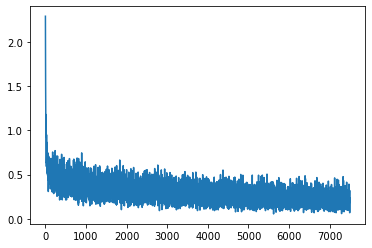

In [11]:
import numpy as np
import util
from NeuralNetwork import *
from train import *
import mnist_reader
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
trainX = X_train.reshape(-1,28,28)
train_X = trainX.astype('float32')/255.0

nn = NeuralNetwork()

nn.add_layer(Dense(784, 500))
nn.add_layer(Relu())

nn.add_layer(Dense(500, 200))
nn.add_layer(BatchNorm_1d(200))
nn.add_layer(Relu())

nn.add_layer(Dense(200, 100))
nn.add_layer(BatchNorm_1d(100))
nn.add_layer(Relu())

nn.add_layer(Dense(100, 10))

learning_rate = 0.01
momentum = 0.9
optimizer = SGD(nn.parameters(),learning_rate,momentum)

epochs=8
batch_size = 64
reg = 0#1e-3
print_n=1000

losses = train_nn(nn,train_X,y_train,optimizer,cross_entropy_grad_loss,epochs,batch_size,reg,print_n)

plt.plot(losses)

In [12]:
print(np.mean(nn.predict(train_X)==y_train))
test_X = X_test.reshape(-1,28,28).astype('float32')/255.0
print(np.mean(nn.predict(test_X)==y_test))

0.9066833333333333
0.8766


## 5.4 正则化Regularization
### 5.4.2 Dropout


In [47]:
from Layers import * 
class Dropout(Layer):
    def __init__(self, drop_p):
        super().__init__()
        self.retain_p = 1-drop_p 
        
    def forward(self, x, training=True):  
        retain_p = self.retain_p
        if training:
            self._mask = (np.random.rand(*x.shape) < retain_p) / retain_p
            out = x * self._mask
        else:
            out = x          
        return out
    
    def backward(self, dx_output,training=True):
        dx = None
        if training:
            dx = dx_output * self._mask
        else:
            dx = dx_output         
        return dx

In [48]:
np.random.seed(1)
dropout = Dropout(0.3)
X = np.random.rand(2, 4)
print(X)
print(dropout.forward(X))
dx_output = np.random.rand(2, 4)
print(dx_output)
print(dropout.backward(dx_output))

[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]]
[[5.95745721e-01 1.02903499e+00 1.63392596e-04 4.31903675e-01]
 [2.09651273e-01 0.00000000e+00 2.66086016e-01 4.93658181e-01]]
[[0.4173048  0.55868983 0.14038694 0.19810149]
 [0.80074457 0.96826158 0.31342418 0.69232262]]
[[0.59614972 0.79812833 0.20055277 0.28300213]
 [1.14392081 0.         0.44774883 0.98903231]]


In [49]:
import numpy as np
import util
from NeuralNetwork import *
from train import *
import mnist_reader
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

trainX = X_train.reshape(-1,28,28)
train_X = trainX.astype('float32')/255.0

nn = NeuralNetwork()
nn.add_layer(Dense(784, 500))
nn.add_layer(Relu())
nn.add_layer(Dropout(0.25))
nn.add_layer(Dense(500, 200))
nn.add_layer(Relu())
nn.add_layer(Dropout(0.2))
nn.add_layer(Dense(200, 100))
nn.add_layer(Relu())
nn.add_layer(Dense(100, 10))

learning_rate = 0.01
momentum = 0.9
optimizer = SGD(nn.parameters(),learning_rate,momentum)

epochs=8
batch_size = 64
reg = 0#1e-3
print_n=1000

losses = train_nn(nn,train_X,y_train,optimizer,cross_entropy_grad_loss,epochs,batch_size,reg,print_n)
plt.plot(losses)

FileNotFoundError: [Errno 2] No such file or directory: 'data/fashion/train-labels-idx1-ubyte.gz'

In [18]:
print(np.mean(nn.predict(train_X)==y_train))
test_X = X_test.reshape(-1,28,28).astype('float32')/255.0
print(np.mean(nn.predict(test_X)==y_test))

0.8872333333333333
0.8667
